# 4. Membrane Separation Process Layouts

In this set of notes we will use an example ultrafiltration process to introduce material balances in different process configurations. We will consider a Batch, semi-Batch (feed and bleed) and continuous membrane processes to develop general ideas around material balances in membrane units. Every example will be introduced by a slight variant of a problem statement. 

## 4.1 Batch

__Problem Statement__ 

500 l of fruit juice are concentrated from an initial solid-residue content of 0.05 kg/l to a solid-residue content of 0.2 kg/l through a batch microfiltration process. The total area of the membrane is of 20 $\mathrm{m^2}$ and the flux of pure water through the membrane is captured by the empirical expression: $J=BC^{-1} [m/h]$ with $B=0.1$ where C is the solid residue concentration in kg/l. Compute the process time necessary to reach the target concentration.

<img src="./batch.png" alt="Drawing" style="width: 300px;">

__Solution trace__

The global differential material balance (volume basis) reads: 

$$
\frac{dV}{dt}=-J\,A
$$(eq1)

where $V$ is the volume in the concentrate loop, $J$ the permeate flux per unit area and $A$ the total membrane area. 
The permeate flux is defined by the expression: 

$$
J=BC^{-1}
$$(eq2)

with $B=0.1$. 

Since the solid residue never leaves the retentate loop,  the differential material balance on the solid residue reads: 

$$
\frac{dm}{dt}=0 
$$(eq3)

Which means that the total mass of solid residue is constant and equal to its initial mass:

$$
m=m_0=V_0C_0 
$$(eq4)

The global differential material balance can thus be rewritten as: 

$$
\frac{dV}{dt}=-J\,A=-\frac{B}{V_0C_0 }AV
$$(eq5)

\newpage

In this simple case it can be integrated analytically to compute the volume as a function of time: 

$$
\int_{V_0}^{V^{\prime}}\frac{dV}{V}=\int_0^{t^{\prime}}-\frac{B}{V_0C_0 }Adt
$$(eq6)

$$
\int_{V_0}^{V^{\prime}}\frac{dV}{V}=\left[\ln{V}\right]^{V^{\prime}}_{V_0}=\ln\left(\frac{V^\prime}{V_0}\right)
$$(eq7)

$$
\int_0^{t^{\prime}}-\frac{B}{V_0C_0 }Adt=-\frac{B}{V_0C_0 }At^\prime
$$(eq8)

Putting together both sides of the equation and substituting $V^\prime$ with $V$ for the sake of simplicity in the notation we get: 

$$
V(t)=V_0e^{-\frac{B}{V_0C_0 }At}
$$(eq9)

which describes the time dependence of the volume in the batch membrane separator. 

The concentration can thus be calculated as: 

$$
C(t)=\frac{m}{V(t)}=\frac{C_0V_0}{V_0}e^{\frac{B}{V_0C_0 }At}={C_0}e^{\frac{B}{V_0C_0 }At}
$$(eq10)

The process time necessary to obtain a solid residue concentration of 0.2 $[kg/l]$ is of 17.3 $[h]$

__Numerical solution__

The process time necessary to obtain a solid residue concentration of 0.2 [kg/l] is: [17.32867951] [h]


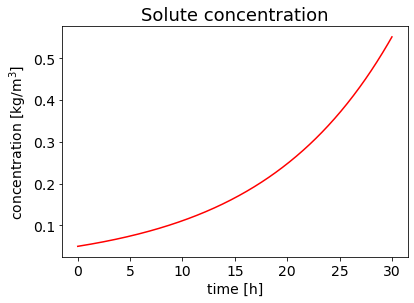

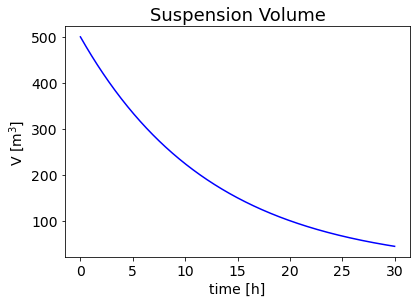

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import fsolve

# Parameters: 
N = 500 #number of points
time = np.linspace(0, 30, N)

A=20;  #m^2
B=0.1;
C0=0.05;
V0=500;

C_specific = 0.2

#Operating Equation
C = C0*np.exp(B*A/V0/C0*time) 
V = V0*np.exp(-B*A/V0/C0*time) 

#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,0.8,0.8])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.plot(time,C, marker=' ' , color='r')

plt.title('Solute concentration', fontsize=18);
axes.set_xlabel('time [h]', fontsize=14);
axes.set_ylabel('concentration [kg/m$^3$]',fontsize=14);

figure=plt.figure()
axes = figure.add_axes([0.1,0.1,0.8,0.8])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.plot(time,V, marker=' ' , color='b')

plt.title('Suspension Volume', fontsize=18);
axes.set_xlabel('time [h]', fontsize=14);
axes.set_ylabel('V [m$^3$]',fontsize=14);


def equation(proc_time):
    eq1 = C0*np.exp(B*A/V0/C0*proc_time) - C_specific
    return eq1

process_time = fsolve(equation,[1])

print("The process time necessary to obtain a solid residue concentration of", C_specific, "[kg/l] is:", process_time, "[h]") 

## 4.2 Feed and Bleed

__Feed and Bleed:  Problem Statement__

500 l of fruit juice are concentrated in 5 h of steady state operation from an initial solid-residue content of 0.05 $kg/l$ through a feed and bleed process. The total area of the membrane is of 20 $m^2$ and the flux of pure water through the membrane is captured by the empirical expression: $J=BC^{-1} [m/h]$ with $B=0.1$ where C is the solid residue concentration in kg/l. Is the steady state concentration of the retentate compatible with the specifics of 0.2 $kg/l$? 

<img src="feedandbleed.png" alt="Drawing" style="width: 300px;">

__Feed and Bleed: Solution trace__

Also in this case the global differential material balance and the solid-residue material balance can be written as follows: 

$$
\frac{dV}{dt}=Q_{IN}-J\,A-Q_{OUT}=0
$$(eq11)

$$
\frac{dm}{dt}=Q_{IN}C_{IN}-Q_{OUT}C_{OUT}=0
$$(eq12)

At steady state ${dV}/{dt}=0$ as well as ${dm}/{dt}=0$. The two ODEs become then two algebraic equations that should be solved together to compute the steady state concentration. 
From the global material balance we get: 

$$
Q_{OUT}=Q_{IN}-J\,A=Q_{IN}-\frac{B}{C_{OUT}}A
$$(eq13)

and then, with some manipulations: 

$$
C_{OUT}=C_{IN}+\frac{AB}{Q_{IN}}
$$(eq14)

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import fsolve

# data: 
A=20;  
B=0.1;
C0=0.05;
V0=500;
process_time=5; 

Cout=C0+A*B*process_time/V0


print("The steady state concentration is", Cout, "[kg/l]") 

The steady state concentration is 0.07 [kg/l]


## 4.3 Cascade configuration

__Problem Statement__

500 l of fruit juice are concentrated in 5 h of steady state operation from an initial solid-residue content of 0.05 kg/l through four membrane separation units characterised by a total membrane area of 20 $\mathrm{m^2}$ each.
The flux of pure water through the membrane is captured by the empirical expression: $J=BC^{-1} [m/h]$ with $B=0.1$ where C is the solid residue concentration in kg/l.

Is it more efficient to design a single stage configuration with four units in parallel or a cascade configuration with four units in series? 

<img src="cascade.png" alt="Drawing" style="width: 600px;">

__Cascade: Solution trace__

Each stage can be treated like a single unit in which the feed stream corresponds to the retentate stream from the previous unit.
We can thus define: 

$$
C_{OUT,i}=C_{IN,i+1}
$$(eq15)

$$
Q_{OUT,i}=Q_{IN,i+1}
$$(eq16)

where the index $i$ identifies the stage. 

The material balances for each stage at steady state can thus be written as: 

$$
\frac{dV}{dt}=Q_{IN,i}-n_iJ(C_{IN,i+1})\,A-Q_{IN,i+1}=0
$$(eq17)

$$
\frac{dm}{dt}=Q_{IN,i}C_{IN}-Q_{IN,i+1}C_{IN,i+1}=0
$$(eq18)

where $n_i$ is the number of modules used in stage $i$.

For each stage we can thus compute the steady state concentration and concentrate volumetric flow by solving sequentially the following equations:  

$$
C_{IN,i+1}=C_{IN,i}+n_i\frac{AB}{Q_{IN,i}}
$$(eq19)

$$
Q_{IN,i+1}=\frac{C_{IN,i}{Q_{IN,i}}}{C_{IN,i+1}}
$$(eq20)

with $i=1...N$ with $N$ is the total number of stages. 

__Numerical Solution__ 

The solution of a cascade composed of any number of stages, each formed by an arbitrary number of modules in parallel can be tackled sequentially through a simple cycle similar to the following:  

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import fsolve

# data: 
A=20;  
B=0.1;
C0=0.05;
V0=500;
process_time=5; 


# The number of elements of this array corresponds to the number of stages. 
# The value in each element is the number of modules per stage. 
n=np.array([5, 4, 3, 2]);

CIN=np.append(C0,np.zeros(np.size(n)-1))
FIN=np.append(V0/process_time, np.zeros(np.size(n)-1));

# Input to the intermediate stages
for i in range(1,np.size(n)): 
    CIN[i]=CIN[i-1]+n[i-1]*A*B/FIN[i-1];
    FIN[i]=CIN[i-1]*FIN[i-1]/CIN[i];

# Output concentration
Cout=CIN[np.size(n)-1]+n[np.size(n)-1]*A*B/FIN[np.size(n)-1];

print("The steady state concentration is", Cout, "[kg/l]") 

The steady state concentration is 1.5444000000000002 [kg/l]


In order to answer the problem request one should solve the system for two different configurations. 
In the first, representing a single-stage configuration with four membrane units in parallel, the number of stages should be set to $N=1$ and the number of units in the first stage $n_1$ to 4. 

In [4]:
# The number of elements of this array corresponds to the number of stages. 
# The value in each element is the number of modules per stage. 
n=np.array([4]);

CIN=np.append(C0,np.zeros(np.size(n)-1))
FIN=np.append(V0/process_time, np.zeros(np.size(n)-1));

# Input to the intermediate stages
for i in range(1,np.size(n)): 
    CIN[i]=CIN[i-1]+n[i-1]*A*B/FIN[i-1];
    FIN[i]=CIN[i-1]*FIN[i-1]/CIN[i];

# Output concentration
Cout=CIN[np.size(n)-1]+n[np.size(n)-1]*A*B/FIN[np.size(n)-1];

print("The steady state concentration is", Cout, "[kg/l]") 

The steady state concentration is 0.13 [kg/l]


In the second the number of stages should be set to $N=4$, each of the stages being assembled as a single unit ($n_i=1$ for $i=[1, 4]$).

In [5]:
# The number of elements of this array corresponds to the number of stages. 
# The value in each element is the number of modules per stage. 
n=np.array([1, 1, 1, 1]);

CIN=np.append(C0,np.zeros(np.size(n)-1))
FIN=np.append(V0/process_time, np.zeros(np.size(n)-1));

# Input to the intermediate stages
for i in range(1,np.size(n)): 
    CIN[i]=CIN[i-1]+n[i-1]*A*B/FIN[i-1];
    FIN[i]=CIN[i-1]*FIN[i-1]/CIN[i];

# Output concentration
Cout=CIN[np.size(n)-1]+n[np.size(n)-1]*A*B/FIN[np.size(n)-1];

print("The steady state concentration is", Cout, "[kg/l]") 

The steady state concentration is 0.19208000000000003 [kg/l]


The cascade configuration allows for a more efficient process since it allows to obtain a larger concentration with the same number of modules. 